In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dummy_survey_excel.csv')
df

,ID,Umur,Jenis_Kelamin,Wilayah,Pendidikan,Pendapatan_Bulanan,Kepuasan
0,1,56,Perempuan,Jawa Barat,S1,12,2
1,2,46,Laki-laki,Jawa Barat,S2,3,1
2,3,32,Perempuan,Jakarta,SMA,9,5
3,4,25,Perempuan,Bali,Diploma,9,4
4,5,38,Laki-laki,Jawa Tengah,S1,18,4
...,...,...,...,...,...,...,...
495,496,56,Perempuan,Jakarta,SMA,10,5
496,497,49,Perempuan,Jawa Timur,SMA,10,4
497,498,41,Laki-laki,Jawa Timur,S2,5,3
498,499,40,Perempuan,Jakarta,SMA,4,3


In [ ]:
#EDA
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  500 non-null    int64 
 1   Umur                500 non-null    int64 
 2   Jenis_Kelamin       500 non-null    object
 3   Wilayah             500 non-null    object
 4   Pendidikan          500 non-null    object
 5   Pendapatan_Bulanan  500 non-null    int64 
 6   Kepuasan            500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB
None


               ID        Umur  Pendapatan_Bulanan    Kepuasan
count  500.000000  500.000000           500.00000  500.000000
mean   250.500000   39.326000            10.46000    3.038000
std    144.481833   12.200386             5.13977    1.431312
min      1.000000   18.000000             2.00000    1.000000
25%    125.750000   29.000000             6.00000    2.000000
50%    250.500000   41.000000     

In [ ]:
#Eksplorasi Data Analisis
data = df.copy()
#Cek Duplikasi
print(f"Jumlah data yang terduplikat : {data.duplicated().sum()}")

#Cek missing Values
print(f"Jumlah Missing Values dalam Dataset : \n{data.isna().sum()}")

Jumlah data yang terduplikat : 0
Jumlah Missing Values dalam Dataset : 
ID                    0
Umur                  0
Jenis_Kelamin         0
Wilayah               0
Pendidikan            0
Pendapatan_Bulanan    0
Kepuasan              0
dtype: int64


In [ ]:
#Menghitung Rata-Rata Umur Responden
mean_umur = df['Umur'].mean()
print(f"Rata-rata Umur Responden: {mean_umur:.3f}")

#Menghitung Distribusi Jenis Kelamin
distribusi_jenis_kelamin = df['Jenis_Kelamin'].value_counts(normalize=True) * 100
print("\nDistribusi Jenis Kelamin:")
print(f"Persentase Laki-laki: {distribusi_jenis_kelamin['Laki-laki']:.2f}%")
print(f"Persentase Perempuan: {distribusi_jenis_kelamin['Perempuan']:.2f}%")

#Menghitung Rata-Rata Pendapatan Per Wilayah
mean_pendapatan_per_wilayah = df.groupby('Wilayah')['Pendapatan_Bulanan'].mean().reset_index()
print("\nRata-rata Pendapatan per Wilayah:")
print(mean_pendapatan_per_wilayah)

#Menghitung Persentase Kepuasan lebih dari 3
persentase_kepuasan = (df['Kepuasan'] >= 4).mean() * 100
print(f"\nPersentase Responden dengan Kepuasan >= 4: {persentase_kepuasan:.2f}%")

#Menghitung Rata-Rata Kepuasan per Wilayah
mean_kepuasan = df.groupby("Wilayah")["Kepuasan"].mean().reset_index()
print(f"Rata-rata Kepuasan per Wilayah: \n{mean_kepuasan}")

Rata-rata Umur Responden: 39.326

Distribusi Jenis Kelamin:
Persentase Laki-laki: 49.20%
Persentase Perempuan: 50.80%

Rata-rata Pendapatan per Wilayah:
       Wilayah  Pendapatan_Bulanan
0         Bali           10.132075
1      Jakarta           10.227723
2   Jawa Barat           10.436893
3  Jawa Tengah           11.176471
4   Jawa Timur           10.318182

Persentase Responden dengan Kepuasan >= 4: 40.80%
Rata-rata Kepuasan per Wilayah: 
       Wilayah  Kepuasan
0         Bali  2.792453
1      Jakarta  3.178218
2   Jawa Barat  3.029126
3  Jawa Tengah  3.019608
4   Jawa Timur  3.204545


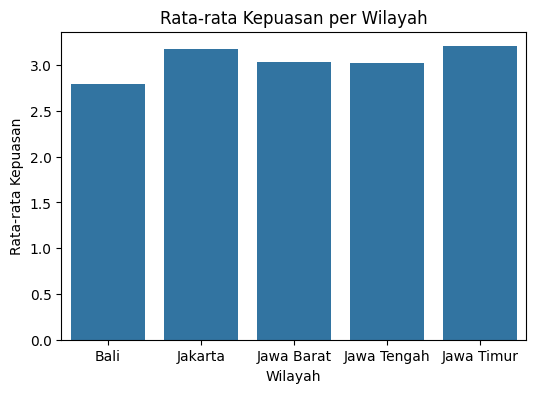

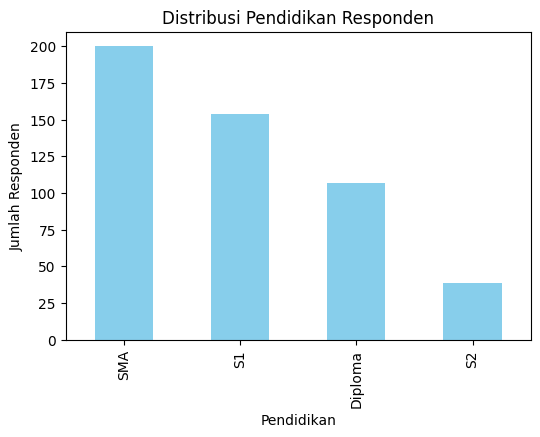

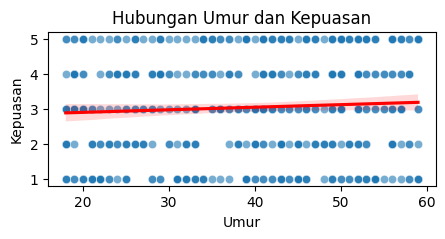

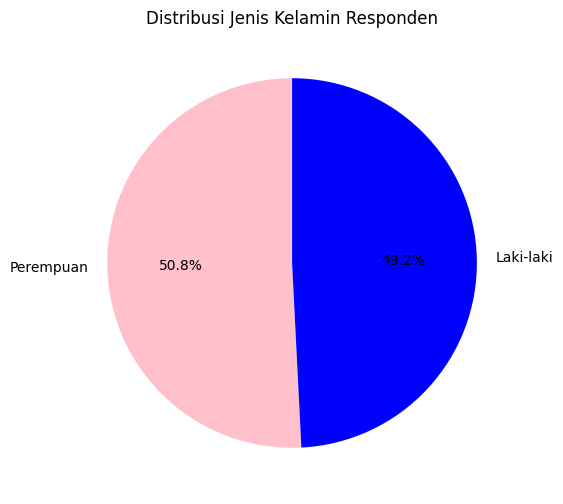

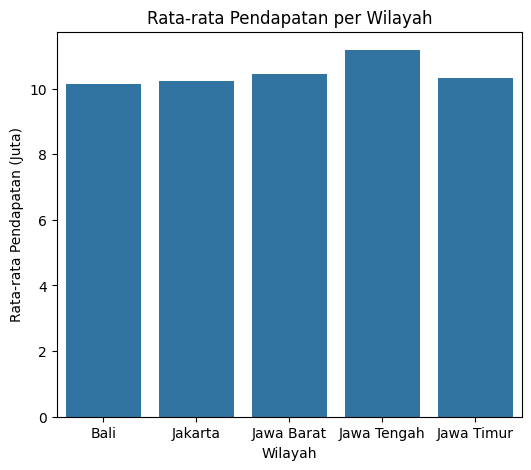

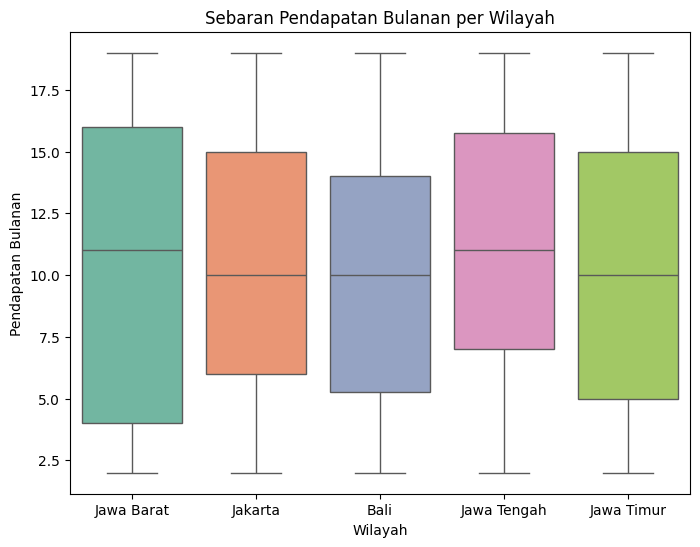

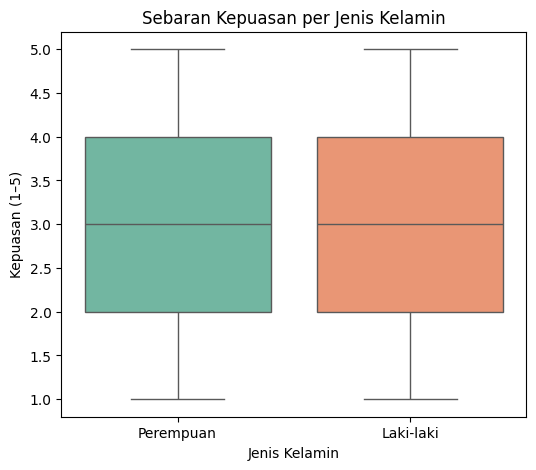

In [ ]:
#Grafik-Grafik
plt.figure(figsize=(6, 4))
sns.barplot(data=mean_kepuasan, x="Wilayah", y="Kepuasan")
plt.title("Rata-rata Kepuasan per Wilayah")
plt.ylabel("Rata-rata Kepuasan")
plt.xlabel("Wilayah")
plt.show()

print("\n")

plt.figure(figsize=(6,4))
df["Pendidikan"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribusi Pendidikan Responden")
plt.ylabel("Jumlah Responden")
plt.xlabel("Pendidikan")
plt.show()

print("\n")

plt.figure(figsize=(5,2))
sns.scatterplot(data=df, x="Umur", y="Kepuasan", alpha=0.6)
sns.regplot(data=df, x="Umur", y="Kepuasan", scatter=False, color="red")
plt.title("Hubungan Umur dan Kepuasan")
plt.show()

print("\n")

jk_counts = df["Jenis_Kelamin"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(jk_counts, labels=jk_counts.index, autopct='%1.1f%%', colors=["pink", "blue"], startangle=90)
plt.title("Distribusi Jenis Kelamin Responden")
plt.show()

print("\n")

plt.figure(figsize=(6, 5))
sns.barplot(data=mean_pendapatan_per_wilayah, x="Wilayah", y="Pendapatan_Bulanan")
plt.title("Rata-rata Pendapatan per Wilayah")
plt.ylabel("Rata-rata Pendapatan (Juta)")
plt.xlabel("Wilayah")
plt.show()

print("\n")

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Wilayah",
    y="Pendapatan_Bulanan",
    hue="Wilayah",        # tambahkan hue
    legend=False,         # biar nggak muncul legend dobel
    palette="Set2"
)
plt.title("Sebaran Pendapatan Bulanan per Wilayah")
plt.ylabel("Pendapatan Bulanan")
plt.xlabel("Wilayah")
plt.show()

print("\n")
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Jenis_Kelamin", y="Kepuasan", hue="Jenis_Kelamin", legend=False, palette="Set2")
plt.title("Sebaran Kepuasan per Jenis Kelamin")
plt.ylabel("Kepuasan (1–5)")
plt.xlabel("Jenis Kelamin")
plt.show()
